### DSC 530 Final Project - Updated Philadelphia Vehicle Accident Data

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
import statistics
from scipy.stats import poisson
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("crash_data_collision_crash_2007_2017.csv")

### Variable Explanation

#### For this analysis I am using the following variables:

In [ ]:
# crash_month = month in which crash occurred
# day_of_week = day of week on which crash occurred
# hour_of_day = hour of day in which crash occurred
# time_of_day = minute number of day during which crash occurred
#      example: 10:15 AM = 1015
#      example: 10:15 PM = 2215
# illumination = lighting conditions when crash occurred
# weather = weather type when crash occurred
# road_condition = condition of road when crash occurred
# fatal_count = number of fatalaties resulting from the crash
# maj_inj_count = number of major injuries resulting from the crash
# mod_inj_count = number of moderate injuries resulting from the crash
# min_inj_count = number of minor injuries resulting from the crash
# tot_inj_count = number of injuries resulting from the crash
# motorcycle_count = number of motorcycles involved in the crash
# small_truck_count = number of small trucks involved in the crash
# heavy_truck_count = number of heavy trucks involved in the crash
# suv_count = number of suvs involved in the crash
# van_count = number of vans involved in the crash
# unbelted_occ_count = number of vehicle occupants not wearing a seatbelt at time of crash
# bicycle_count = number of bicycles involved in the crash
# driver_count_16yr = number of drivers 16 years of age involved in the crash
# driver_count_17yr = number of drivers 17 years of age involved in the crash
# driver_count_18yr = number of drivers 18 years of age involved in the crash
# driver_count_19yr = number of drivers 19 years of age involved in the crash
# driver_count_20yr = number of drivers 20 years of age involved in the crash
# driver_count_50_64yr = number of drivers 50 to 64 years of age involved in the crash
# driver_count_65_74yr = number of drivers 65 to 74 years of age involved in the crash
# driver_count_75plus = number of drivers 75 years of age or older involved in the crash

## Time Details of Crash

### Hour of Day of Crash

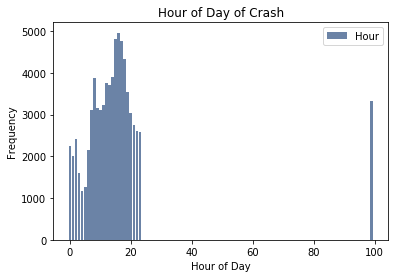

<Figure size 576x432 with 0 Axes>

In [3]:
# histogram for hour of day during which the crash occurred
hist = thinkstats2.Hist(df.hour_of_day, label = "Hour")
thinkplot.Hist(hist)
thinkplot.Show(xlabel = 'Hour of Day', ylabel = 'Frequency', title = "Hour of Day of Crash")

The histogram indicates outliers in the data.  The value is '99' and indicates an unknown value.  The outliers should be removed as the value 99 is unknown and is not relevant to the data.  The histogram below is updated with outliers removed.

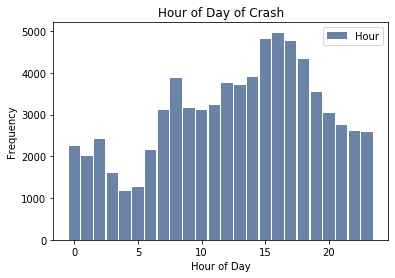

<Figure size 576x432 with 0 Axes>

In [4]:
# histogram for hour of day during which the crash occurred - removing outliers
hist = thinkstats2.Hist(df.hour_of_day.replace(99, np.nan), label = "Hour")
thinkplot.Hist(hist)
thinkplot.Show(xlabel = 'Hour of Day', ylabel = 'Frequency', title = "Hour of Day of Crash")

The distribution is not normally distributed, it is positively skewed.  

In [5]:
# Calculate Descriptive Statistics For Hour of Day

mean_hour = np.mean(df.hour_of_day.replace(99, np.nan))
mode_hour = statistics.mode(df.hour_of_day.replace(99, np.nan))
stdev_hour = np.nanstd(df.hour_of_day.replace(99, np.nan))

print('Mean Hour of Day: ', round(mean_hour,1))
print('Mode Hour of Day:', mode_hour)
print('Variance for Hour of Day variable:', round(stdev_hour,1))

Mean Hour of Day:  12.7
Mode Hour of Day: 16.0
Variance for Hour of Day variable: 6.2


The distance between the mean and mode validate the absence of normalcy in the distribution. 

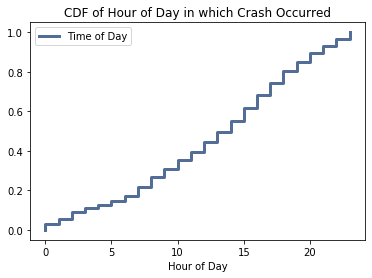

<Figure size 576x432 with 0 Axes>

In [6]:
cdf = thinkstats2.Cdf(df.hour_of_day.replace(99, np.nan), label = 'Time of Day')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'Hour of Day', ylable = 'CDF', title = 'CDF of Hour of Day in which Crash Occurred')

The CDF above looks like steps as there are only 24 discrete values.  The CDF below uses 'Time of Day' instead which shows a more consistent distribution as there are 1,440 values (one for each minute of a day).  The value 9999 (unknown), has been replaced with missing values.

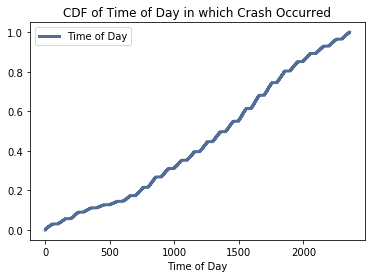

<Figure size 576x432 with 0 Axes>

In [7]:
cdf = thinkstats2.Cdf(df.time_of_day.replace(9999, np.nan), label = 'Time of Day')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel = 'Time of Day', ylable = 'CDF', title = 'CDF of Time of Day in which Crash Occurred')

In [8]:
# Calculate the percentile rank for hour of crash

# hour to evaluate
hourofcrash = 11
hour = df.hour_of_day

# function to calculate percentile rank for hour of crash
def EvalHourCdf(hour, hourofcrash):
    
    #iterator for crashed before or same hour as evaluated hour
    count = 0.0
    # for loop to evaluate and count crashes before or same hour as evaluated hour
    for value in hour:
        if value <= hourofcrash:
            count += 1
    
    print('Hour of crash: ',hourofcrash)
    prob = count / len(hour)
    
    return prob

percentile_hour = EvalHourCdf(hour, hourofcrash)
print('Percentile Rank ', round(percentile_hour*100,1))

Hour of crash:  11
Percentile Rank  37.9


Percentile rank for crashes at 11AM (hour of day - includes the hour from 11:00 to 11:59 AM)  38% of reported crashes occur before noon.

In [9]:
# Calculate the percentile rank for time of crash

# hour to evaluate
timeofcrash = 900
time = df.time_of_day

# function to calculate percentile rank for hour of crash
def EvalTimeCdf(time, timeofcrash):
    
    #iterator for crashed before or at same time as evaluated time
    count = 0.0
    # for loop to evaluate and count crashes before or same time as evaluated time
    for value in time:
        if value <= timeofcrash:
            count += 1
    
    print('Time of crash: ', timeofcrash)
    prob = count / len(time)
    
    return prob

percentile_time = EvalTimeCdf(time, timeofcrash)
print('Percentile Rank ', round(percentile_time*100,1))

Time of crash:  900
Percentile Rank  26.0


Percentile rank for crashes at 9AM. (Time of day)  26% of crashes occur at 9:00 AM or earlier.

### Day of the Week

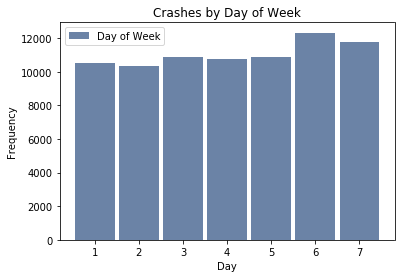

<Figure size 576x432 with 0 Axes>

In [10]:
# count values of all days of week for crashes and create histogram
hist = thinkstats2.Hist(df.day_of_week, label = "Day of Week")
thinkplot.Hist(hist)
thinkplot.Show(xlabel = 'Day', ylabel = 'Frequency', title = 'Crashes by Day of Week')

The 'Crashes by Day of Week' histogram indicates a higher volume of crashes reported of Fridays and Saturdays (days 6 and 7).

### By Month

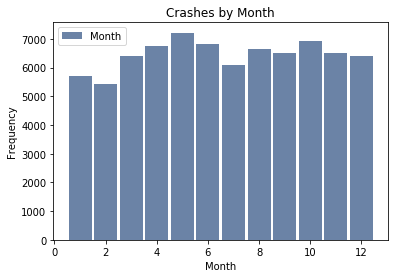

<Figure size 576x432 with 0 Axes>

In [11]:
# count values of months for crashes and create histogram
hist = thinkstats2.Hist(df.crash_month, label = "Month")
thinkplot.Hist(hist)
thinkplot.Show(xlabel = 'Month', ylabel = 'Frequency', title = 'Crashes by Month')

The 'Crashes by Month' histogram indcates a upward trend in crashes from Feburary through May (month 5).  This may be due to more vehicles on the road with nicer weather as we move through Spring.  We also see an uptick in reports for the month of September compared to adjacent months.

## Environmental Factors

### Lighting at time of crash

In [ ]:
# Values for variable = 'illumination'
1 – Daylight 
2 – Dark – no street lights 
3 – Dark – street lights 
4 – Dusk 
5 – Dawn 
6 – Dark – unknown roadway lighting 
8 – Other 
9 – Unknown (expired)

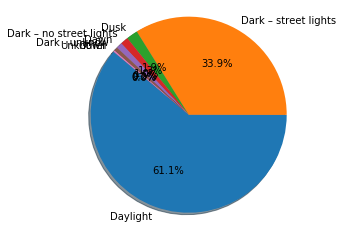

In [12]:
# Data to plot
labels = 'Daylight','Dark – street lights','Dusk' ,'Dark – no street lights','Dawn','Dark - unknow','Other','Unknown'

# Plot
plt.pie(df.illumination.value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

More than 60% of reported crashes occur in 'daylight' (61%) with an additional 34% in the dark with street lights present.

### Weather at time of crash

In [ ]:
# Values for variable = 'weather'
1 – No adverse conditions 
2 – Rain 
3 – Sleet (hail) 
4 – Snow 
5 – Fog 
6 – Rain and fog 
7 – Sleet and fog 
8 – Other 
9 – Unknown

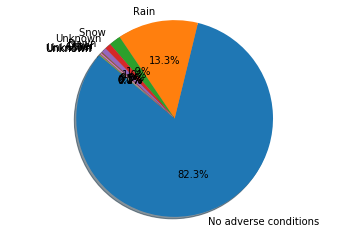

In [14]:
# Data to plot
labels = 'No adverse conditions','Rain','Snow ' ,'Unknown','Dawn','Other','Other','Unknown','Unknown','Unknown'

# Plot
plt.pie(df.weather.value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

More than 4 out of 5 crashes occur when there are no adverse weather conditions.  Among adverse conditions, the most common at the time of an accident is 'rain' (13% of reported crashes).

### Injuries Resulting From Crashes

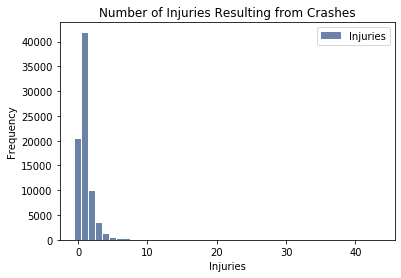

<Figure size 576x432 with 0 Axes>

In [15]:
# count values of injuries for crashes and create histogram
hist = thinkstats2.Hist(df.injury_count, label = "Injuries")
thinkplot.Hist(hist)
thinkplot.Show(xlabel = 'Injuries', ylabel = 'Frequency', title = 'Number of Injuries Resulting from Crashes')

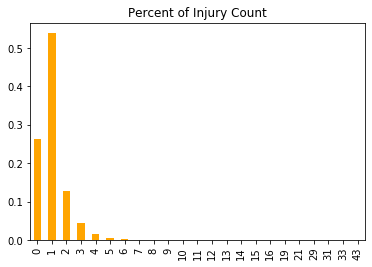

In [16]:
# Histogram using percent instead of frequencies
dfinjury = df.injury_count.value_counts()
dfinjury = dfinjury.to_frame()

dflen = len(df)
for i in dfinjury:
    injurypercent = dfinjury.injury_count/dflen
    dfinjury['PERCENT'] = injurypercent
    
sorted_injurypercent = injurypercent.sort_index()
sorted_injurypercent.plot(kind = 'bar', color = 'orange', title = 'Percent of Injury Count')

In [17]:
# Calculate Descriptive Statistics For Number of Injuries
mean_injuries = np.mean(df.injury_count)
mode_injuries = statistics.mode(df.injury_count)
stdev_injuries = np.nanstd(df.injury_count)

print('Mean # Injuries: ', round(mean_injuries,1))
print('Mode # Injuries:', mode_injuries)
print('Variance for # Injuries:', round(stdev_injuries,1))

Mean # Injuries:  1.1
Mode # Injuries: 1
Variance for # Injuries: 1.0


The distribution for the injury_count variable resembles the Poisson distribution.  You could use the Poisson distribution to estimate the likelihood of a specific number of injuries resulting from a crash.

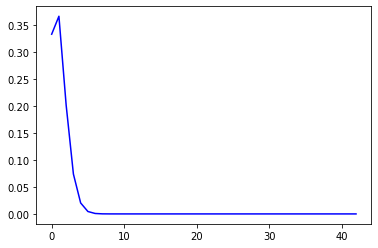

In [18]:
# Plot the Poisson Analytical Distribution
mu = 1.1
dist = poisson(mu)
x = np.arange(0,43)
plt.plot(x, dist.pmf(x), color = 'blue')

99% of crashes have 4 or fewer injuries, there are outliers in the variable.  For purposes of getting a better view of the proportional comparisons among the highest frequencies (0 through 4), I am removing the outliers with 5 or more injuries.

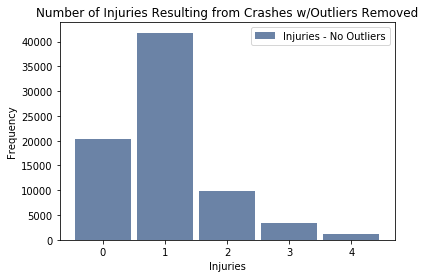

<Figure size 576x432 with 0 Axes>

In [19]:
# create new variable that includes only crashes with 4 or fewer injuries
df['injuries'] = np.where(df['injury_count'] < 5, df['injury_count'], np.nan)
hist = thinkstats2.Hist(df.injuries, label = "Injuries - No Outliers")
thinkplot.Hist(hist)
thinkplot.Show(xlabel = 'Injuries', ylabel = 'Frequency', title = 'Number of Injuries Resulting from Crashes w/Outliers Removed')

In [20]:
# Calculate Descriptive Statistics For Number of Injuries with outliers removed
mean_injuries = np.mean(df['injuries'])
mode_injuries = statistics.mode(df['injuries'])
stdev_injuries = np.nanstd(df['injuries'])

print("Outliers Removed:")
print('Mean # Injuries: ', round(mean_injuries,1))
print('Mode # Injuries:', mode_injuries)
print('Variance for # Injuries:', round(stdev_injuries,1))

Outliers Removed:
Mean # Injuries:  1.0
Mode # Injuries: 1.0
Variance for # Injuries: 0.8


In [21]:
# calculate percentage of injury count
# create new dataframe of percentages by injury count
dfinjcount = df.injury_count.value_counts()

dfinjcount = dfinjcount.to_frame()

dflen = len(df)

for i in dfinjcount:
    injpercent = dfinjcount.injury_count/dflen
    dfinjcount['PERCENT'] = injpercent
    
print('The dataframe below shows the percent of recorded crashes for each value of the injury_count variable.')
print('It validates that 99% of crashes have 4 or fewer injuries.')
print('It also indicates that the higher values such as 29, 31, 33, and 43 may be outliers.\n')
print(dfinjcount)

The dataframe below shows the percent of recorded crashes for each value of the injury_count variable.
It validates that 99% of crashes have 4 or fewer injuries.
It also indicates that the higher values such as 29, 31, 33, and 43 may be outliers.

    injury_count   PERCENT
1          41786  0.539439
0          20373  0.263006
2           9811  0.126656
3           3366  0.043454
4           1262  0.016292
5            448  0.005783
6            219  0.002827
7             92  0.001188
8             42  0.000542
9             17  0.000219
10            13  0.000168
11             7  0.000090
13             6  0.000077
14             4  0.000052
12             3  0.000039
16             3  0.000039
15             2  0.000026
19             2  0.000026
21             2  0.000026
33             1  0.000013
29             1  0.000013
31             1  0.000013
43             1  0.000013


## Correlation Analysis & Scatterplots

In [22]:
from scipy.stats.stats import pearsonr   

In [23]:
# Measure correlation between num cars and num injuries

a = df.total_units
b = df.injury_count
print (pearsonr(a,b))

(0.11001804520197542, 3.817740828304897e-207)


Weak relationship between the total number of vehicles in the crash and total injuries.

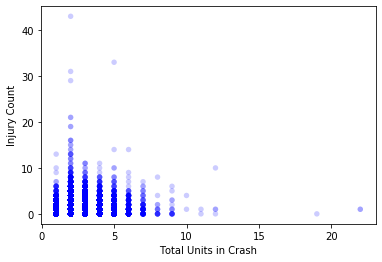

<Figure size 576x432 with 0 Axes>

In [24]:
# Scatterplot of injury count and total units (vehicles) in crash

a = df.total_units
b = df.injury_count


thinkplot.Scatter(a,b)
thinkplot.Show(xlabel = 'Total Units in Crash', ylabel = 'Injury Count')

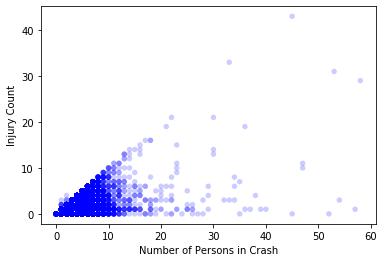

<Figure size 576x432 with 0 Axes>

In [25]:
# Scatterplot of person count and injury count
a = df.person_count
b = df.injury_count

thinkplot.Scatter(a,b)
thinkplot.Show(xlabel = 'Number of Persons in Crash', ylabel = 'Injury Count')

The scatterplot indicates an increase in the number of injuries as the number of persons involved in the crash increases.  It's intuitive and one of the

In [26]:
# Measure correlation between number of persons in the crash and number of injuries

a = df.person_count
b = df.injury_count
print (pearsonr(a,b))

(0.4767781942310868, 0.0)


The correlation coefficient of 0.48 indicates a moderately strong relationship between the number of persons involved in a crash and the number of injuries resulting from the crash.

## Create age groupings for comparison

In [27]:
# age variables
df['age_16'] = np.where(df['driver_count_16yr'] >= 1, 1, 0)
df['age_17'] = np.where(df['driver_count_17yr'] >= 1, 1, 0)
df['age_18'] = np.where(df['driver_count_18yr'] >= 1, 1, 0)
df['age_19'] = np.where(df['driver_count_19yr'] >= 1, 1, 0)
df['age_20'] = np.where(df['driver_count_20yr'] >= 1, 1, 0)
df['age_50_64'] = np.where(df['driver_count_50_64yr'] >= 1, 1, 0)
df['age_65_75'] = np.where(df['driver_count_65_74yr'] >= 1, 1, 0)
df['age_75plus'] = np.where(df['driver_count_75plus'] >= 1, 1, 0)

In [28]:
# create 2 variables based on age for comparison:
df['younger'] = df['age_16'] + df['age_17'] + df['age_18'] + df['age_19'] + df['age_20']
df['older'] = df['age_50_64'] + df['age_65_75'] + df['age_75plus']

In [29]:
df_younger = df[df['younger'] > 0]
df_older = df[df['older'] > 0]

## PMF

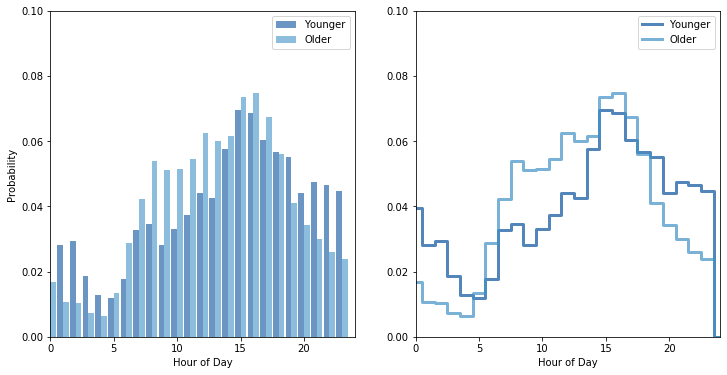

<Figure size 576x432 with 0 Axes>

In [30]:
# plot the PMFs
younger_pmf = thinkstats2.Pmf(df_younger.hour_of_day, label='Younger')
older_pmf = thinkstats2.Pmf(df_older.hour_of_day, label='Older')
width = 0.45

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(younger_pmf, align='right', width=width)
thinkplot.Hist(older_pmf, align='left', width=width)
thinkplot.Config(xlabel='Hour of Day',ylabel='Probability',axis=[0, 24, 0, 0.1])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([younger_pmf, older_pmf])
thinkplot.Show(xlabel='Hour of Day',axis=[0, 24, 0, 0.1])

The PMF comparing younger and older drivers shows a higher probability of crashes for younger drivers between the hours of 9PM and 4 AM and higher probability for older drivers between the hours of 7 AM and 2 PM.

### Hypothesis 1: There is a relationship between vehicle type and the presence of (fatal) injuries in the data.

In [31]:
# create dummy variables for regression

# vehicle type
df['veh_type_heavytruck'] = np.where(df['heavy_truck_count'] >= 1, 1, 0)
df['veh_type_smalltruck'] = np.where(df['small_truck_count'] >= 1, 1, 0)
df['veh_type_suv'] = np.where(df['suv_count'] >= 1, 1, 0)
df['veh_type_van'] = np.where(df['van_count'] >= 1, 1, 0)
df['veh_type_motorcycle'] = np.where(df['motorcycle_count'] >= 1, 1, 0)
df['veh_type_bicycle'] = np.where(df['bicycle_count'] >= 1, 1, 0)

# injury type
df['injury_major'] = np.where(df['maj_inj_count'] >= 1, 1, 0)
df['injury_moderate'] = np.where(df['mod_inj_count'] >= 1, 1, 0)
df['injury_minor'] = np.where(df['min_inj_count'] >= 1, 1, 0)
df['injury_total'] = (df['tot_inj_count'])
df['injury_fatal'] = np.where(df['fatal_count'] >= 1, 1, 0)


In [ ]:
#  data is set up for hyp 1
'veh_type_heavytruck', 'veh_type_suv', 'veh_type_motorcycle', 'veh_type_smalltruck', 'veh_type_van', 'veh_type_bicycle', 
'injury_major', 'injury_moderate', 'injury_minor', 'injury_total', 'injury_fatal'


In [32]:
# Regression formula with fatal injury as dependent (endogenous) and vehicle types as independent (exogenous)
formula='injury_fatal ~ veh_type_heavytruck + veh_type_suv + veh_type_smalltruck + veh_type_van'

# Using poisson regression
model = smf.poisson(formula, data=df)

# Use fit method to fit the model to the data and return regression result
results = model.fit()

# Output a summary of the regression results
results.summary() 

Optimization terminated successfully.
         Current function value: 0.046367
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:           injury_fatal   No. Observations:                77462
Model:                        Poisson   Df Residuals:                    77457
Method:                           MLE   Df Model:                            4
Date:                Fri, 28 Feb 2020   Pseudo R-squ.:                0.004629
Time:                        19:36:07   Log-Likelihood:                -3591.7
converged:                       True   LL-Null:                       -3608.4
Covariance Type:            nonrobust   LLR p-value:                 9.867e-07
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -4.6619      0.052    -90.333      0.000      -4.763      -4.561
veh_type_heavytruck     0.2110      0.188      1.125      0.260      -0.157       0.579
veh_type_suv           -0.4117      0.094     -4.390      0.000      -0.595      -0.228
veh_type_smalltruck    -0.5104      0.154     -3.323      0.001      -0.811      -0.209
veh_type_van           -0.1104      0.131     -0.846      0.398      -0.366       0.145
=======================================================================================
"""

The results above indicate that SUVs and Small Trucks are significant in the relationship to fatalities resulting from a crash.  However, the coefficients for each are negative, which tells us that the likelihood of a fatality in the crash is reduced if the vehicles involved are SUVs or Small Trucks.

The pseudo R-squared is very small which tells us vehicle type does not explain the variation in the occurrence of fatalities.

In [33]:
# Regression formula with fatal injury as dependent (endogenous) and vehicle types as independent (exogenous)
# adding in motorcycle and bicylce vehicles to formula
formula='injury_fatal ~ veh_type_heavytruck + veh_type_suv + veh_type_smalltruck + veh_type_van + veh_type_motorcycle + veh_type_bicycle'

# Using poisson regression
model = smf.poisson(formula, data=df)

# Use fit method to fit the model to the data and return regression result
results = model.fit()

# Output a summary of the regression results
results.summary() 

Optimization terminated successfully.
         Current function value: 0.044802
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:           injury_fatal   No. Observations:                77462
Model:                        Poisson   Df Residuals:                    77455
Method:                           MLE   Df Model:                            6
Date:                Fri, 28 Feb 2020   Pseudo R-squ.:                 0.03825
Time:                        19:36:11   Log-Likelihood:                -3470.4
converged:                       True   LL-Null:                       -3608.4
Covariance Type:            nonrobust   LLR p-value:                 1.121e-56
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -4.8837      0.059    -83.292      0.000      -4.999      -4.769
veh_type_heavytruck     0.3320      0.188      1.766      0.077      -0.037       0.701
veh_type_suv           -0.2801      0.095     -2.949      0.003      -0.466      -0.094
veh_type_smalltruck    -0.3983      0.154     -2.584      0.010      -0.700      -0.096
veh_type_van           -0.0112      0.131     -0.086      0.932      -0.268       0.246
veh_type_motorcycle     2.0459      0.107     19.106      0.000       1.836       2.256
veh_type_bicycle       -0.1748      0.218     -0.801      0.423      -0.603       0.253
=======================================================================================
"""

Adding Motorcyles and Bicycles to the formula: no change for SUVs and Small Trucks, however Heavy Trucks are now significant at a 0.1 level, and the coefficient is positive.  While not significant at our .05 level, it does indicate a stronger relationship between Heavy Trucks and fatalities.  Motorcycles are significant (<.05) and have a positive coefficient as well. This may be telling us that the combination of Heavy Trucks and Motorcycles in a crash is related to fatalities.

The pseudo R-squared is very small which tells us vehicle type does not explain the variation in the occurrence of fatalities.

In [34]:
# Regression formula with fatal injury as dependent (endogenous) and vehicle types as independent (exogenous)
# adding in motorcycle and bicylce vehicles to formula
formula='injury_fatal ~ unbelted_occ_count + veh_type_heavytruck + veh_type_suv + veh_type_smalltruck + veh_type_van + veh_type_motorcycle + veh_type_bicycle'

# Using poisson regression
model = smf.poisson(formula, data=df)

# Use fit method to fit the model to the data and return regression result
results = model.fit()

# Output a summary of the regression results
results.summary() 

Optimization terminated successfully.
         Current function value: 0.044765
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:           injury_fatal   No. Observations:                77462
Model:                        Poisson   Df Residuals:                    77454
Method:                           MLE   Df Model:                            7
Date:                Fri, 28 Feb 2020   Pseudo R-squ.:                 0.03902
Time:                        19:36:15   Log-Likelihood:                -3467.6
converged:                       True   LL-Null:                       -3608.4
Covariance Type:            nonrobust   LLR p-value:                 5.057e-57
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -4.9149      0.060    -81.658      0.000      -5.033      -4.797
unbelted_occ_count      0.1411      0.055      2.575      0.010       0.034       0.249
veh_type_heavytruck     0.3280      0.188      1.744      0.081      -0.041       0.697
veh_type_suv           -0.2853      0.095     -3.003      0.003      -0.472      -0.099
veh_type_smalltruck    -0.4036      0.154     -2.618      0.009      -0.706      -0.101
veh_type_van           -0.0246      0.131     -0.188      0.851      -0.282       0.233
veh_type_motorcycle     2.0602      0.107     19.209      0.000       1.850       2.270
veh_type_bicycle       -0.1680      0.218     -0.769      0.442      -0.596       0.260
=======================================================================================
"""

Using the same formula and adding in 'unbelted occupants' we see the following:
Unbelted occupants is significant and positive (unbelted occupants is positively related to fatality) and the pseudo R-squared is slightly higher which either indicates a little more of the variation is explained, or it increased because we added another explanatory variable.

In [36]:
# Regression formula with fatal injury as dependent (endogenous) and vehicle types as independent (exogenous)
formula='injury_count ~ veh_type_heavytruck + veh_type_suv + veh_type_smalltruck + veh_type_van'

# Using poisson regression
model = smf.poisson(formula, data=df)

# Use fit method to fit the model to the data and return regression result
results = model.fit()

# Output a summary of the regression results
results.summary() 

Optimization terminated successfully.
         Current function value: 1.295875
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:           injury_count   No. Observations:                77462
Model:                        Poisson   Df Residuals:                    77457
Method:                           MLE   Df Model:                            4
Date:                Fri, 28 Feb 2020   Pseudo R-squ.:                0.001183
Time:                        19:36:35   Log-Likelihood:            -1.0038e+05
converged:                       True   LL-Null:                   -1.0050e+05
Covariance Type:            nonrobust   LLR p-value:                 2.903e-50
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0255      0.005      5.248      0.000       0.016       0.035
veh_type_heavytruck    -0.0918      0.019     -4.730      0.000      -0.130      -0.054
veh_type_suv            0.0509      0.007      6.836      0.000       0.036       0.065
veh_type_smalltruck     0.0003      0.011      0.029      0.977      -0.021       0.022
veh_type_van            0.1398      0.011     13.304      0.000       0.119       0.160
=======================================================================================
"""

In [37]:
# Regression formula with fatal injury as dependent (endogenous) and vehicle types as independent (exogenous)
formula='injury_count ~ unbelted_occ_count + veh_type_heavytruck + veh_type_suv + veh_type_smalltruck + veh_type_van + veh_type_motorcycle + veh_type_bicycle'

# Using poisson regression
model = smf.poisson(formula, data=df)

# Use fit method to fit the model to the data and return regression result
results = model.fit()

# Output a summary of the regression results
results.summary() 




Optimization terminated successfully.
         Current function value: 1.289961
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:           injury_count   No. Observations:                77462
Model:                        Poisson   Df Residuals:                    77454
Method:                           MLE   Df Model:                            7
Date:                Fri, 28 Feb 2020   Pseudo R-squ.:                0.005740
Time:                        19:36:39   Log-Likelihood:                -99923.
converged:                       True   LL-Null:                   -1.0050e+05
Covariance Type:            nonrobust   LLR p-value:                6.864e-245
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0056      0.005     -1.084      0.279      -0.016       0.005
unbelted_occ_count      0.1447      0.004     33.203      0.000       0.136       0.153
veh_type_heavytruck    -0.0950      0.019     -4.891      0.000      -0.133      -0.057
veh_type_suv            0.0458      0.007      6.113      0.000       0.031       0.060
veh_type_smalltruck    -0.0049      0.011     -0.442      0.658      -0.027       0.017
veh_type_van            0.1247      0.011     11.825      0.000       0.104       0.145
veh_type_motorcycle     0.0249      0.022      1.121      0.262      -0.019       0.068
veh_type_bicycle       -0.0214      0.017     -1.243      0.214      -0.055       0.012
=======================================================================================
"""

Regression with injury count as the dependent reveals a significant and positive relationship between unbelted occupants and SUV and Van vehicle types.  This indicates there are more injuries when vans and SUVs are involved in a crash, especially when the occupants are unbelted.

In [38]:
# Regression formula with fatal injury as dependent (endogenous) and vehicle types as independent (exogenous)
formula='maj_inj_count ~ unbelted_occ_count + veh_type_heavytruck + veh_type_suv + veh_type_smalltruck + veh_type_van + veh_type_motorcycle + veh_type_bicycle'

# Using poisson regression
model = smf.poisson(formula, data=df)

# Use fit method to fit the model to the data and return regression result
results = model.fit()

# Output a summary of the regression results
results.summary() 

Optimization terminated successfully.
         Current function value: 0.117137
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:          maj_inj_count   No. Observations:                77462
Model:                        Poisson   Df Residuals:                    77454
Method:                           MLE   Df Model:                            7
Date:                Fri, 28 Feb 2020   Pseudo R-squ.:                 0.01657
Time:                        19:36:42   Log-Likelihood:                -9073.7
converged:                       True   LL-Null:                       -9226.6
Covariance Type:            nonrobust   LLR p-value:                 3.500e-62
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.8114      0.034   -112.134      0.000      -3.878      -3.745
unbelted_occ_count      0.2187      0.024      8.992      0.000       0.171       0.266
veh_type_heavytruck     0.2485      0.110      2.269      0.023       0.034       0.463
veh_type_suv           -0.0932      0.051     -1.834      0.067      -0.193       0.006
veh_type_smalltruck    -0.0702      0.075     -0.933      0.351      -0.218       0.077
veh_type_van            0.0565      0.071      0.793      0.428      -0.083       0.196
veh_type_motorcycle     1.4316      0.078     18.410      0.000       1.279       1.584
veh_type_bicycle        0.1166      0.108      1.084      0.278      -0.094       0.327
=======================================================================================
"""

When isolating the dependent variable to 'major' injuries, heavy truck and motorcycles are significant as well as unbelted occupants.

### Hypothesis 2: Certain age brackets for drivers are impacted to a greater degree by weather or road conditions.

In [39]:
# create dummy variables for regression

# weather type
df['weather_rain'] = np.where(df['weather'] == 2,1,0)
df['weather_sleet_hail'] = np.where(df['weather'] == 3,1,0)
df['weather_snow'] = np.where(df['weather'] == 4,1,0)
df['weather_fog'] = np.where(df['weather'] == 5,1,0)
df['weather_rain_fog'] = np.where(df['weather'] == 6,1,0)
df['weather_sleet_fog'] = np.where(df['weather'] == 7,1,0)

In [ ]:
# data is set up for hyp 2
'younger', 'older' 
'weather_rain', 'weather_sleet_hail', 'weather_snow', 'weather_fog', 'weather_rain_fog', 'weather_sleet_fog'

In [40]:
formula='younger ~ weather_rain + weather_snow + weather_sleet_hail + weather_fog + weather_rain_fog + weather_sleet_fog'
model = smf.poisson(formula, data=df)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 0.320841
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                younger   No. Observations:                77462
Model:                        Poisson   Df Residuals:                    77455
Method:                           MLE   Df Model:                            6
Date:                Fri, 28 Feb 2020   Pseudo R-squ.:               0.0003016
Time:                        19:36:49   Log-Likelihood:                -24853.
converged:                       True   LL-Null:                       -24860.
Covariance Type:            nonrobust   LLR p-value:                   0.02027
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.3687      0.013   -184.989      0.000      -2.394      -2.344
weather_rain           0.1250      0.033      3.801      0.000       0.061       0.189
weather_snow           0.0472      0.084      0.563      0.573      -0.117       0.211
weather_sleet_hail    -0.0161      0.268     -0.060      0.952      -0.541       0.508
weather_fog            0.1351      0.289      0.468      0.640      -0.431       0.701
weather_rain_fog       0.0249      0.230      0.108      0.914      -0.425       0.475
weather_sleet_fog     -0.3259      0.447     -0.728      0.466      -1.203       0.551
======================================================================================
"""

In [41]:
formula='older ~ weather_rain + weather_snow + weather_sleet_hail + weather_fog + weather_rain_fog + weather_sleet_fog'
model = smf.poisson(formula, data=df)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 0.756159
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                  older   No. Observations:                77462
Model:                        Poisson   Df Residuals:                    77455
Method:                           MLE   Df Model:                            6
Date:                Fri, 28 Feb 2020   Pseudo R-squ.:               0.0003978
Time:                        19:36:52   Log-Likelihood:                -58574.
converged:                       True   LL-Null:                       -58597.
Covariance Type:            nonrobust   LLR p-value:                 2.233e-08
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.9705      0.006   -152.489      0.000      -0.983      -0.958
weather_rain          -0.0768      0.018     -4.311      0.000      -0.112      -0.042
weather_snow          -0.2344      0.048     -4.906      0.000      -0.328      -0.141
weather_sleet_hail    -0.1022      0.139     -0.736      0.462      -0.374       0.170
weather_fog           -0.0345      0.156     -0.220      0.825      -0.341       0.272
weather_rain_fog      -0.2235      0.129     -1.729      0.084      -0.477       0.030
weather_sleet_fog      0.1321      0.177      0.747      0.455      -0.215       0.479
======================================================================================
"""

### Hypothesis 3: The combination of road type and weather conditions show a relationship to traffic incidents.

In [43]:
# create dummy variables for regression

# road condition
df['road_condition_dry'] = np.where(df['road_condition'] == '0',1,0)
df['road_condition_wet'] = np.where(df['road_condition'] == '1',1,0)
df['road_condition_sand'] = np.where(df['road_condition'] == '2',1,0)
df['road_condition_snow'] = np.where(df['road_condition'] == '3',1,0)
df['road_condition_slush'] = np.where(df['road_condition'] == '4',1,0)
df['road_condition_ice'] = np.where(df['road_condition'] == '5',1,0)
df['road_condition_icepatch'] = np.where(df['road_condition'] == '6',1,0)
df['road_condition_water'] = np.where(df['road_condition'] == '7',1,0)

In [ ]:
# data is set up for hyp 3
'road_condition_dry', 'road_condition_wet', 'road_condition_sand', 'road_condition_snow', 'road_condition_slush', 
'road_condition_ice', 'road_condition_icepatch', 'road_condition_water'
'weather_rain', 'weather_sleet_hail', 'weather_snow', 'weather_fog', 'weather_rain_fog', 'weather_sleet_fog'

I am unable to assess hypothesis 3.  To sufficiently address this hypothesis I would need data related to traffic volume for each day.

### Hypothesis 4: Adverse weather increases the instances of injuries among accidents.

In [ ]:
# data is set up for hyp 4

'weather_rain', 'weather_sleet_hail', 'weather_snow', 'weather_fog', 'weather_rain_fog', 'weather_sleet_fog'
'injury_major', 'injury_moderate', 'injury_minor', 'injury_total', 'injury_fatal'

In [44]:
formula='injury_count ~ weather_rain + weather_snow + weather_sleet_hail + weather_fog + weather_rain_fog + weather_sleet_fog'
model = smf.poisson(formula, data=df)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 1.296727
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:           injury_count   No. Observations:                77462
Model:                        Poisson   Df Residuals:                    77455
Method:                           MLE   Df Model:                            6
Date:                Fri, 28 Feb 2020   Pseudo R-squ.:               0.0005254
Time:                        19:39:26   Log-Likelihood:            -1.0045e+05
converged:                       True   LL-Null:                   -1.0050e+05
Covariance Type:            nonrobust   LLR p-value:                 1.694e-20
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0681      0.004     17.974      0.000       0.061       0.075
weather_rain          -0.0589      0.011     -5.593      0.000      -0.079      -0.038
weather_snow          -0.2101      0.028     -7.479      0.000      -0.265      -0.155
weather_sleet_hail    -0.3128      0.092     -3.409      0.001      -0.493      -0.133
weather_fog           -0.2540      0.104     -2.447      0.014      -0.457      -0.051
weather_rain_fog       0.0097      0.068      0.141      0.888      -0.125       0.144
weather_sleet_fog     -0.0817      0.117     -0.697      0.486      -0.311       0.148
======================================================================================
"""

Four of the weather types are significant to injury counts in a crash: rain, snow, sleet/hail, and fog.  Each of the four significant weather types have a negative coefficient, indicating a negative relationship to injuries; injury counts are lower when the four weather types are present.  

### Hypothesis 5: There is a higher incidence of accidents in areas based on latitude and longitude.

I am unable to assess this hypothesis.